In [79]:
from matplotlib import pyplot as plt
import numpy as np
import re

# Select all files to load via regex
regex = ".*"

# Files to load. t = num_timesteps, l = lut_depth, s = samples, w = reward weights
files = [
    "Stabilizer code",
    "lut_t=3_l=2_w=111_noise=0.0_s=1_trained_on_bloch_sphere",
    "lut_t=3_l=2_w=111_noise=0.0_s=1_reference",
    "lut_t=3_l=2_w=111_noise=0.0_s=1_reference2",
    "lut_t=3_l=2_w=111_noise=0.0_tet=10",
    "lut_t=3_l=2_w=111_noise=0.0_tet=20",
    "lut_t=3_l=2_w=111_noise=0.0_tet=29",
    "lut_t=3_l=2_w=111_noise=0.0_tet=30",
    "lut_t=3_l=2_w=111_noise=0.0_tet=31",
    "lut_t=3_l=2_w=111_noise=0.0_tet=32",
    "lut_t=3_l=2_w=111_noise=0.0_tet=33",
    "lut_t=3_l=2_w=111_noise=0.0_tet=34",
    "lut_t=3_l=2_w=111_noise=0.0_tet=35",
    "lut_t=3_l=2_w=111_noise=0.0_tet=36",
    "lut_t=32_l=2_w=00000000000000000000000000000001_noise=0.0_s=1",
    "lut_t=32_l=2_w=11111111111111111111111111111111_noise=0.0_s=1",
    "lut_t=33_l=2_w=111111111111111111111111111111111_noise=0.0_s=1",
    "lut_t=3_l=2_w=111_noise=0.0_s=1_eigenvalue_eps=1e-3",
    "lut_t=3_l=2_w=111_noise=0.0_s=1_eigenvalue_eps=0",
    #f"lut_t={t}_l={l}_w={'0'*(t-w)+'1'*w}_noise={0.0}_s={s}"  for t in [3] for w in range(1, t+1) for l in [2,6] for s in range(3)
]
timespan = 50


fidelities_each = []
loaded_files = []
for file in files:
    if not re.match(regex, file):
        continue

    data = np.load(f"{file}.npz")
    fidelities_each.append(data)
    loaded_files.append(file)

baseline_fidelities = np.load("baseline_fidelities.npz")["fidelities"][:timespan+1]

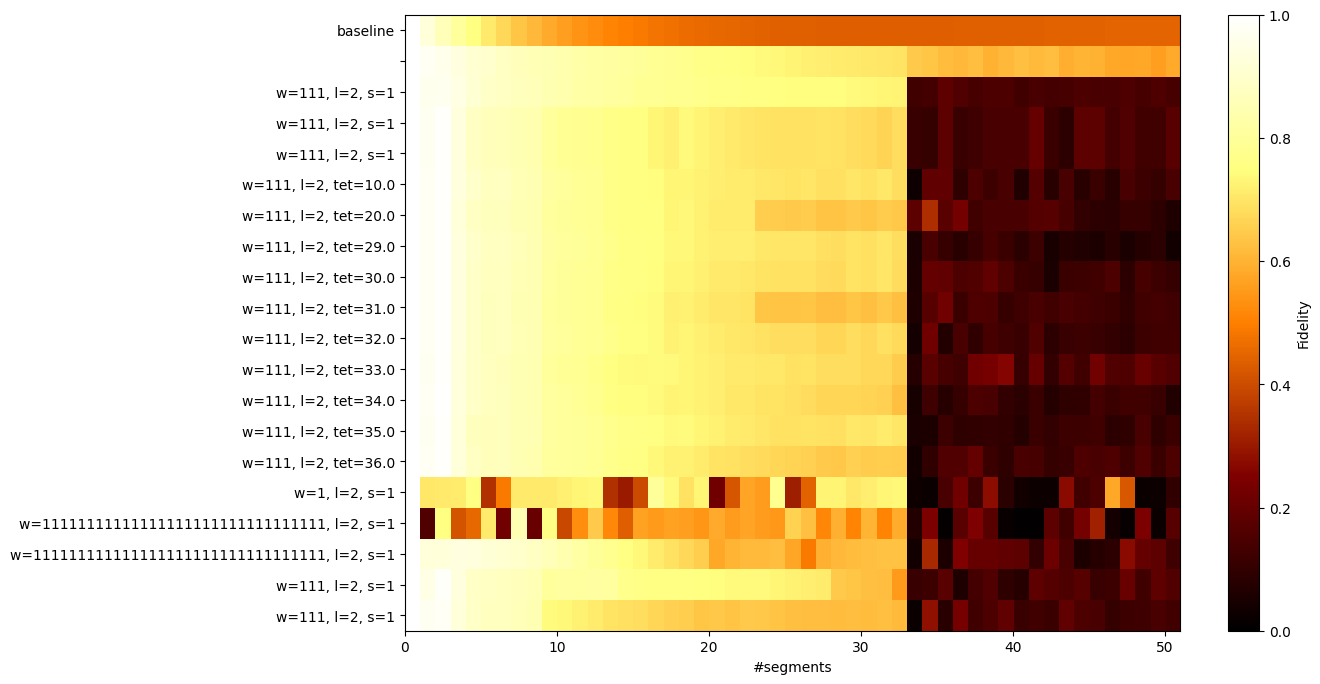

In [80]:
# Read fidelities into matrix and plot 2D graph
label_each = []
fidelities_mat = np.zeros((len(fidelities_each), timespan+1))

fig, ax = plt.subplots(1,1, figsize=(12.5,8))
for i, (filename, fidelities) in enumerate(zip(loaded_files, fidelities_each)):
    color = (
        "lightgrey" if "grape" in filename else
        "tab:blue"  if "lut" in filename else
        "tab:orange" # rnn
    )

    keyword = list(fidelities.keys())[0]

    F = fidelities[keyword]

    # extract variables from filename
    label = ""
    if "t=" in filename:
        t = int(re.search(r't=(\d+)', filename).group(1))
        #label += f"t={t}, "
    if "w=" in filename:
        w = int(re.search(r'w=(\d+)', filename).group(1))
        label += f"w={w}, "
    if "l=" in filename:
        l = int(re.search(r'l=(\d+)', filename).group(1))
        label += f"l={l}, "
    if "s=" in filename:
        s = int(re.search(r's=(\d+)', filename).group(1))
        label += f"s={s}, "
    if "noise=" in filename:
        noise = float(re.search(r'noise=([\d.]+|inf)', filename).group(1))
        #label += f"noise={noise}, "
    if "tet=" in filename:
        tet = float(re.search(r'tet=([\d.]+|inf)', filename).group(1))
        label += f"tet={tet}, "
    if label.endswith(", "):
        label = label[:-2] # remove last ", "

    fidelities_mat[i,:] = F[:timespan+1]
    label_each.append(label)

# Add baseline fidelities as first row
fidelities_mat = np.vstack([baseline_fidelities, fidelities_mat])
label_each = ["baseline"] + label_each

im = ax.imshow(
    fidelities_mat,
    aspect="auto",
    cmap="afmhot",
    vmin=0.0, # for better contrast in colormap
    vmax=1.0,
    extent=[0, fidelities_mat.shape[1], fidelities_mat.shape[0], 0],
    interpolation="none",
)
fig.colorbar(im, ax=ax, label="Fidelity")

#ax.set_xlim(0, 10)
ax.set_xlabel("#segments")
ax.set_yticks(np.arange(len(label_each))+0.5)
ax.set_yticklabels(label_each)
#ax.axvline(x=3)
fig.savefig("fidelity_comparison", bbox_inches="tight")